In [28]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
smoothing_param = 10000

In [34]:
output_dir = f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/'
file_path = f'{output_dir}max_timing_unsmoothed_ave.csv'
columns = ['event', 'scardec_opt_max_timing',  'scardec_moy_max_timing', 'ye_max_timing', 'usgs_max_timing', 'sigloch_0_max_timing', 'sigloch_1_max_timing', 'isc_max_timing']
df = pd.read_csv(file_path, header=None, names=columns)#, header=None)
#df['int_magnitude'] = df['magnitude'].astype(int)

In [35]:
output_dir = f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/'
file_path = f'{output_dir}max_timing_unsmoothed.csv'
columns = ['event', 'scardec_opt_max_timing',  'scardec_moy_max_timing', 'ye_max_timing', 'usgs_max_timing', 'sigloch_0_max_timing', 'sigloch_1_max_timing', 'isc_max_timing']
df2 = pd.read_csv(file_path, header=None, names=columns)#, header=None)
#df['int_magnitude'] = df['magnitude'].astype(int)

In [36]:
df

,event,scardec_opt_max_timing,scardec_moy_max_timing,ye_max_timing,usgs_max_timing,sigloch_0_max_timing,sigloch_1_max_timing,isc_max_timing
20170818_0259,NaN,9246.0,9069.0,NaN,NaN,NaN,NaN,NaN
20110126_1542,NaN,7142.0,7343.0,NaN,NaN,6832.0,NaN,NaN
19981010_1629,NaN,3809.0,3970.0,NaN,NaN,NaN,NaN,NaN
19920730_0824,NaN,7317.0,7575.0,NaN,NaN,NaN,NaN,NaN
19960327_2052,NaN,8203.0,4320.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
20230206_1024,NaN,NaN,NaN,NaN,2640.0,NaN,NaN,NaN
20231202_1437,NaN,NaN,NaN,NaN,5621.0,NaN,NaN,NaN
19971108_1002,NaN,NaN,NaN,NaN,1795.0,NaN,NaN,NaN
20181220_1701,NaN,NaN,NaN,NaN,2303.0,NaN,NaN,NaN


(array([2409., 3922., 3006., 1358.,  363.,   84.,   17.,   21.,   10.,
           7.]),
 array([  79., 1008., 1937., 2866., 3795., 4724., 5653., 6582., 7511.,
        8440., 9369.]),
 <BarContainer object of 10 artists>)

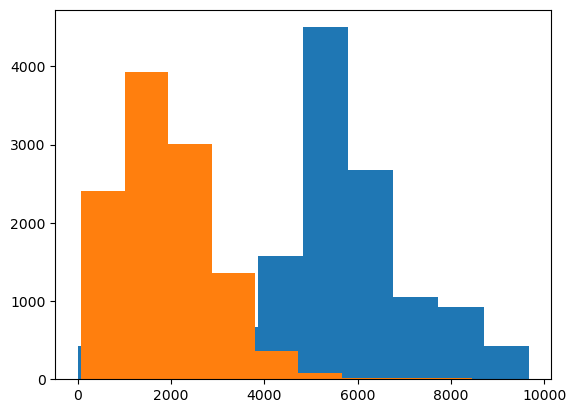

In [38]:
plt.hist(df['sigloch_0_max_timing'])
plt.hist(df2['sigloch_0_max_timing'])

In [139]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined_scardec_ye_usgs_sigloch_isc_mag.csv')


In [140]:
df.drop(columns=['event'], inplace=True)

In [141]:
df.index.name = 'event'
df.reset_index(inplace=True)
#df.drop(columns=['event'], inplace=True)

In [142]:
# Convert 'event' column to string type in both dataframes
df['event'] = df['event'].astype(str)
combined['event'] = combined['event'].astype(str)

# Merge the dataframes on the 'event' column
df_2 = df.merge(combined[['event', 'mag']], on='event', how='left')

# Rename the 'mag' column to 'magnitude' in the merged dataframe
df_2.rename(columns={'mag': 'magnitude'}, inplace=True)

df_2

,event,scardec_opt_max_timing,scardec_moy_max_timing,ye_max_timing,usgs_max_timing,sigloch_0_max_timing,sigloch_1_max_timing,isc_max_timing,magnitude
0,20170818_0259,9244.0,NaN,NaN,NaN,NaN,NaN,NaN,6.591
1,20110126_1542,7144.0,7337.0,NaN,NaN,NaN,NaN,NaN,6.114
2,19981010_1629,3809.0,3962.0,NaN,NaN,NaN,NaN,NaN,5.927
3,19920730_0824,7321.0,NaN,NaN,NaN,NaN,NaN,NaN,6.017
4,19960327_2052,8205.0,4322.0,NaN,NaN,NaN,NaN,NaN,6.157
...,...,...,...,...,...,...,...,...,...
4530,20240122_1809,NaN,NaN,NaN,6180.0,NaN,NaN,NaN,NaN
4531,20240402_2358,NaN,NaN,NaN,3805.0,NaN,NaN,NaN,NaN
4532,20240628_0536,NaN,NaN,NaN,3180.0,NaN,NaN,NaN,NaN
4533,20240817_1910,NaN,NaN,NaN,4066.0,NaN,NaN,NaN,NaN


In [143]:
df_combined = df_2.copy()

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import cmcrameri.cm as cmc

In [145]:
colors = cmc.batlow(np.linspace(0, 1, 5))
unique_datasets = ['scardec', 'usgs', 'sigloch', 'ye', 'isc']
dataset_colors = {dataset: colors[i] for i, dataset in enumerate(unique_datasets)}

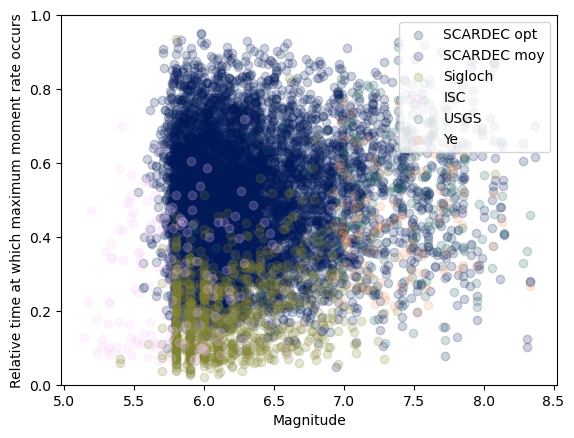

In [146]:
plt.scatter(df_2['magnitude'], df_2['scardec_opt_max_timing']/10000,  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC opt')
plt.scatter(df_2['magnitude'], df_2['scardec_moy_max_timing']/10000,  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC moy')
plt.scatter(df_2['magnitude'], df_2['sigloch_0_max_timing']/10000,  alpha = 0.2, color = dataset_colors['sigloch'], label = 'Sigloch')
plt.scatter(df_2['magnitude'], df_2['isc_max_timing']/10000,  alpha = 0.2, color = dataset_colors['isc'], label = 'ISC')
plt.scatter(df_2['magnitude'], df_2['usgs_max_timing']/10000,  alpha = 0.2, color = dataset_colors['usgs'], label = 'USGS')
plt.scatter(df_2['magnitude'], df_2['ye_max_timing']/10000,  alpha = 0.2, color = dataset_colors['ye'], label = 'Ye')
plt.ylim(0, 1)
plt.legend()
plt.ylabel('Relative time at which maximum moment rate occurs')
plt.xlabel('Magnitude')
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/relative_time_of_max_moment_rate.png')

In [147]:
def myround(x, base=1):
    return base * round(x/base)

In [148]:
catalog = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined_m55_catalog.csv', sep = '|')

In [149]:
cols = catalog.columns
column_names = []
for c in cols:
    column_names.append(c.strip().rstrip().lower())
column_names[0] = 'catalog_id'
catalog.columns = column_names

In [150]:
catalog['year'] = catalog.apply(lambda x: x['time'][:4], axis = 1)
catalog['month'] = catalog.apply(lambda x: x['time'][5:7], axis = 1)
catalog['day'] = catalog.apply(lambda x: x['time'][8:10], axis = 1)
catalog['hour'] = catalog.apply(lambda x: x['time'][11:13], axis = 1)
catalog['minute'] = catalog.apply(lambda x: x['time'][14:16], axis = 1)

catalog['event'] = catalog.apply(lambda x: x['year'] + x['month'] + x['day'] + '_' + x['hour'] + x['minute'], axis = 1)

catalog['int_magnitude'] = catalog.apply(lambda x: myround(x['magnitude']), axis = 1)

In [151]:
catalog.drop(columns = ['contributor', 'contributorid', 'magauthor', 'eventlocationname', 'author', 'catalog', 'time'], inplace = True)

In [152]:
catalog = catalog[['event', 'catalog_id', 'year', 'month', 'day', 'hour', 'minute', 'latitude', 'longitude', 'depth/km', 'magnitude', 'int_magnitude', 'magtype']]

In [153]:
catalog

,event,catalog_id,year,month,day,hour,minute,latitude,longitude,depth/km,magnitude,int_magnitude,magtype
0,20250121_1115,11926233,2025,01,21,11,15,-3.7368,151.5823,10.000,5.5,6,Mww
1,20250121_0605,11926190,2025,01,21,06,05,-27.4829,-13.4632,10.000,5.5,6,mb
2,20250121_0547,11926184,2025,01,21,05,47,13.4344,144.3969,137.242,5.5,6,mww
3,20250120_1617,11926033,2025,01,20,16,17,23.2338,120.4749,10.000,6.0,6,mww
4,20250120_0838,11925968,2025,01,20,08,38,-11.3327,165.8206,35.000,5.6,6,mww
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16101,19900108_1944,2808110,1990,01,08,19,44,52.0105,-169.6001,15.000,5.6,6,mb
16102,19900107_0906,2808066,1990,01,07,09,06,-15.9527,-74.2840,48.900,5.9,6,mb
16103,19900106_2144,2808053,1990,01,06,21,44,-10.6437,92.9744,15.000,5.9,6,mw
16104,19900104_0532,2807962,1990,01,04,05,32,-15.4219,-172.9087,42.600,6.4,6,mb


In [154]:
# Convert 'event' column to string type in both dataframes
df['event'] = df['event'].astype(str)
catalog['event'] = catalog['event'].astype(str)

# Merge the dataframes on the 'event' column
df_3 = df.merge(catalog[['event', 'magnitude', 'depth/km']], on='event', how='left')

# Rename the 'mag' column to 'magnitude' in the merged dataframe
df_3.rename(columns={'mag': 'magnitude'}, inplace=True)

df_3

,event,scardec_opt_max_timing,scardec_moy_max_timing,ye_max_timing,usgs_max_timing,sigloch_0_max_timing,sigloch_1_max_timing,isc_max_timing,magnitude,depth/km
0,20170818_0259,9244.0,NaN,NaN,NaN,NaN,NaN,NaN,6.6,10.000
1,20110126_1542,7144.0,7337.0,NaN,NaN,NaN,NaN,NaN,6.0,23.800
2,19981010_1629,3809.0,3962.0,NaN,NaN,NaN,NaN,NaN,5.8,45.600
3,19920730_0824,7321.0,NaN,NaN,NaN,NaN,NaN,NaN,6.1,31.400
4,19960327_2052,8205.0,4322.0,NaN,NaN,NaN,NaN,NaN,6.0,45.100
...,...,...,...,...,...,...,...,...,...,...
4593,20240122_1809,NaN,NaN,NaN,6180.0,NaN,NaN,NaN,7.0,13.000
4594,20240402_2358,NaN,NaN,NaN,3805.0,NaN,NaN,NaN,7.4,40.000
4595,20240628_0536,NaN,NaN,NaN,3180.0,NaN,NaN,NaN,7.2,24.442
4596,20240817_1910,NaN,NaN,NaN,4066.0,NaN,NaN,NaN,7.0,29.000


In [176]:
import scipy.stats as stats

Text(0.5, 0, 'Magnitude')

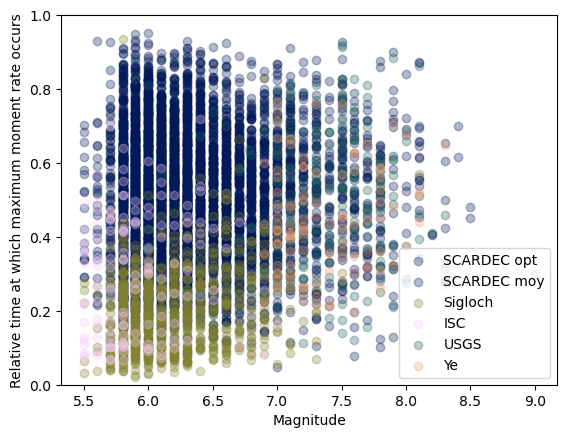

In [180]:
plt.scatter(df_3['magnitude'], df_3['scardec_opt_max_timing']/10000,  alpha = 0.3, color = dataset_colors['scardec'], label = 'SCARDEC opt')
plt.scatter(df_3['magnitude'], df_3['scardec_moy_max_timing']/10000,  alpha = 0.3, color = dataset_colors['scardec'], label = 'SCARDEC moy')
plt.scatter(df_3['magnitude'], df_3['sigloch_0_max_timing']/10000,  alpha = 0.3, color = dataset_colors['sigloch'], label = 'Sigloch')
plt.scatter(df_3['magnitude'], df_3['isc_max_timing']/10000,  alpha = 0.3, color = dataset_colors['isc'], label = 'ISC')
plt.scatter(df_3['magnitude'], df_3['usgs_max_timing']/10000,  alpha = 0.3, color = dataset_colors['usgs'], label = 'USGS')
plt.scatter(df_3['magnitude'], df_3['ye_max_timing']/10000,  alpha = 0.3, color = dataset_colors['ye'], label = 'Ye')
plt.ylim(0, 1)
plt.legend()
plt.ylabel('Relative time at which maximum moment rate occurs')
plt.xlabel('Magnitude')
#plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/relative_time_of_max_moment_rate_vs_depth.png')

In [197]:
print('scardec_opt', np.mean(df_3['scardec_opt_max_timing']/10000))
print('scardec_moy', np.mean(df_3['scardec_moy_max_timing']/10000))
print('sigloch_0', np.mean(df_3['sigloch_0_max_timing']/10000))
print('isc', np.mean(df_3['isc_max_timing']/10000))
print('usgs', np.mean(df_3['usgs_max_timing']/10000))
print('ye', np.mean(df_3['ye_max_timing']/10000))
times = []
times.append(df_3['scardec_opt_max_timing'].values)
times.append(df_3['scardec_moy_max_timing'].values)
times.append(df_3['sigloch_0_max_timing'].values)
times.append(df_3['isc_max_timing'].values)
times.append(df_3['usgs_max_timing'].values)
times.append(df_3['ye_max_timing'].values)
times = np.concatenate(times)
print('overall mean', np.nanmean(times/10000))
print('overall median', np.nanmedian(times/10000))

scardec_opt 0.4774094402035624
scardec_moy 0.5342623547400611
sigloch_0 0.1969845511482255
isc 0.2981068027210884
usgs 0.51343375
ye 0.4439803921568627
overall mean 0.46539840407077604
overall median 0.4739


0.46539840407077604

0.4739

SignificanceResult(statistic=nan, pvalue=nan)
SignificanceResult(statistic=nan, pvalue=nan)
SignificanceResult(statistic=nan, pvalue=nan)
SignificanceResult(statistic=nan, pvalue=nan)
SignificanceResult(statistic=nan, pvalue=nan)
SignificanceResult(statistic=nan, pvalue=nan)


Text(0.5, 0, 'Depth (km)')

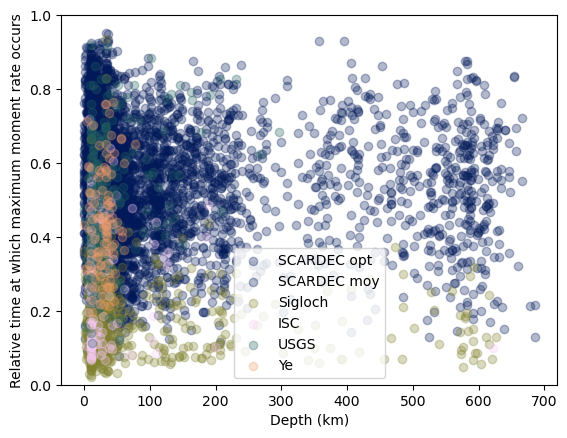

In [ ]:
plt.scatter(df_3['depth/km'], df_3['scardec_opt_max_timing']/10000,  alpha = 0.3, color = dataset_colors['scardec'], label = 'SCARDEC opt')
plt.scatter(df_3['depth/km'], df_3['scardec_moy_max_timing']/10000,  alpha = 0.3, color = dataset_colors['scardec'], label = 'SCARDEC moy')
plt.scatter(df_3['depth/km'], df_3['sigloch_0_max_timing']/10000,  alpha = 0.3, color = dataset_colors['sigloch'], label = 'Sigloch')
plt.scatter(df_3['depth/km'], df_3['isc_max_timing']/10000,  alpha = 0.3, color = dataset_colors['isc'], label = 'ISC')
plt.scatter(df_3['depth/km'], df_3['usgs_max_timing']/10000,  alpha = 0.3, color = dataset_colors['usgs'], label = 'USGS')
plt.scatter(df_3['depth/km'], df_3['ye_max_timing']/10000,  alpha = 0.3, color = dataset_colors['ye'], label = 'Ye')
plt.ylim(0, 1)
plt.legend()
plt.ylabel('Relative time at which maximum moment rate occurs')
plt.xlabel('Depth (km)')
#plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/relative_time_of_max_moment_rate_vs_depth.png')

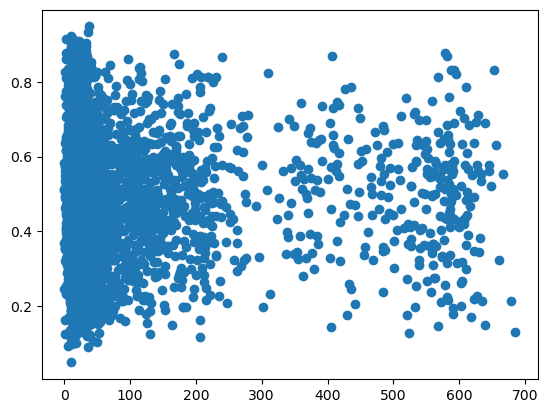

In [173]:
plt.scatter(x, y)

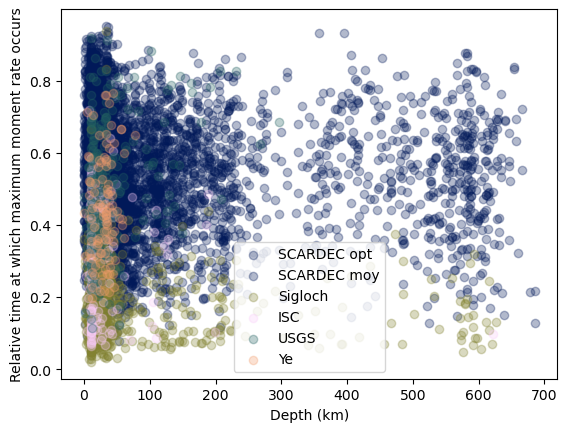

In [161]:
plt.scatter(df_3['depth/km'], df_3['scardec_opt_max_timing']/10000,  alpha = 0.3, color = dataset_colors['scardec'], label = 'SCARDEC opt')
plt.scatter(df_3['depth/km'], df_3['scardec_moy_max_timing']/10000,  alpha = 0.3, color = dataset_colors['scardec'], label = 'SCARDEC moy')
plt.scatter(df_3['depth/km'], df_3['sigloch_0_max_timing']/10000,  alpha = 0.3, color = dataset_colors['sigloch'], label = 'Sigloch')
plt.scatter(df_3['depth/km'], df_3['isc_max_timing']/10000,  alpha = 0.3, color = dataset_colors['isc'], label = 'ISC')
plt.scatter(df_3['depth/km'], df_3['usgs_max_timing']/10000,  alpha = 0.3, color = dataset_colors['usgs'], label = 'USGS')
plt.scatter(df_3['depth/km'], df_3['ye_max_timing']/10000,  alpha = 0.3, color = dataset_colors['ye'], label = 'Ye')
#plt.ylim(0, 0.2)
plt.legend()
plt.ylabel('Relative time at which maximum moment rate occurs')
plt.xlabel('Depth (km)')
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/relative_time_of_max_moment_rate_vs_depth.png')

In [157]:
df_3.columns

Index(['event', 'scardec_opt_max_timing', 'scardec_moy_max_timing',
       'ye_max_timing', 'usgs_max_timing', 'sigloch_0_max_timing',
       'sigloch_1_max_timing', 'isc_max_timing', 'magnitude', 'depth/km'],
      dtype='object')

In [158]:
max_timing = []
depths = []
for i, row in df_3.iterrows():
	for column_name in df_3.columns[1:-2]:
		if pd.isna(row[column_name]) is False:
			max_timing.append(row[column_name])
			depths.append(row['depth/km'])

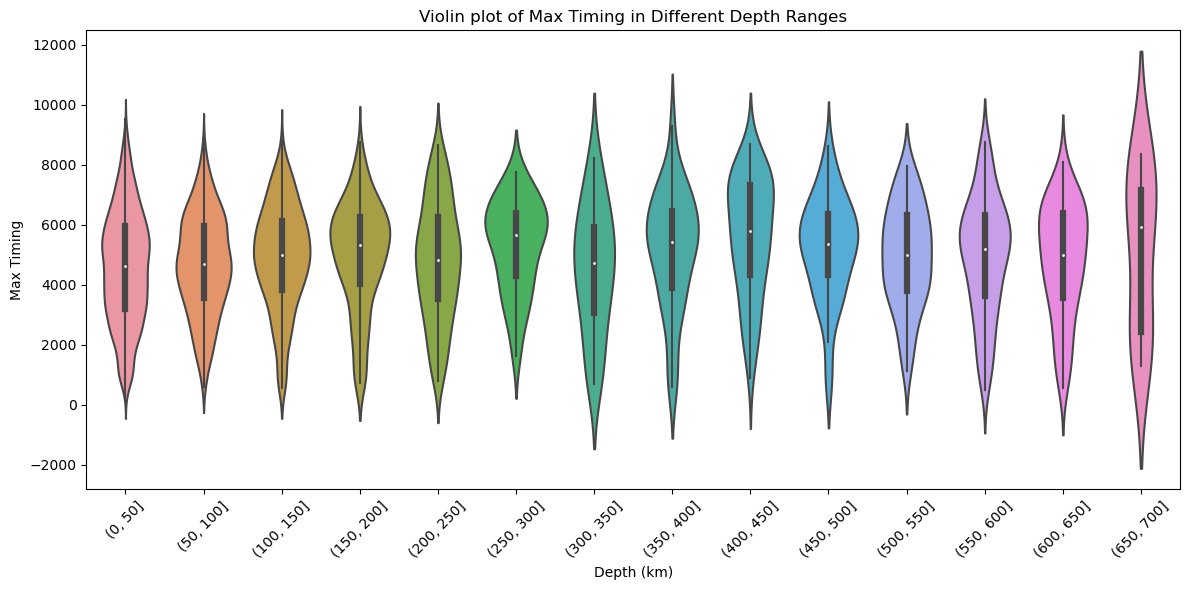

In [163]:
import seaborn as sns

# Create a dataframe from the lists
df_violin = pd.DataFrame({'max_timing': max_timing, 'depth/km': depths})

# Create depth bins
df_violin['depth_bin'] = pd.cut(df_violin['depth/km'], bins=range(0, int(df_violin['depth/km'].max()) + 50, 50))

# Plot violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='depth_bin', y='max_timing', data=df_violin)
plt.xticks(rotation=45)
plt.xlabel('Depth (km)')
plt.ylabel('Max Timing')
plt.title('Violin plot of Max Timing in Different Depth Ranges')
plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/violin_plot_timing_max_mr_depth_bins.png')


In [160]:
max(max_timing)

9514.0